In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Resources/data/city_data.csv"
ride_data_to_load = "Resources/data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
pyber_data = pd.merge(ride_data, city_data, on=["city"], how="left")
# Display the data table for preview
pyber_data.dtypes

city             object
date             object
fare            float64
ride_id           int64
driver_count      int64
type             object
dtype: object

In [2]:
pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

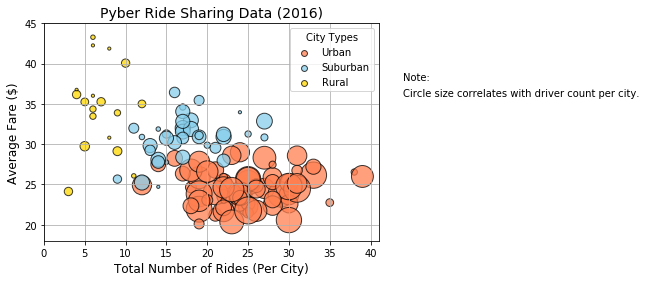

In [3]:
# Obtain the x and y coordinates for each of the three city types

rural = pyber_data[pyber_data['type']=='Rural']
suburban = pyber_data[pyber_data['type']=='Suburban']
urban = pyber_data[pyber_data['type']=='Urban']

rural_rides = rural.groupby(['city']).count()['ride_id']
rural_fare = rural.groupby(['city']).mean()['fare']
rural_drivercount = rural.groupby(['city']).mean()['driver_count']

suburban_rides = suburban.groupby(['city']).count()['ride_id']
suburban_fare = suburban.groupby(['city']).mean()['fare']
suburban_drivercount = suburban.groupby(['city']).mean()['driver_count']

urban_rides = urban.groupby(['city']).count()['ride_id']
urban_fare = urban.groupby(['city']).mean()['fare']
urban_drivercount = urban.groupby(['city']).mean()['driver_count']

# Build the scatter plots for each city types
plt.scatter(urban_rides, urban_fare, marker="o", s = urban_drivercount*10, label = "Urban", 
            facecolors="coral",  edgecolors="black", alpha = 0.75, linewidths = 1)

plt.scatter(suburban_rides, suburban_fare, marker="o", s = suburban_drivercount*10, label = "Suburban", 
            facecolors="skyblue", edgecolors="black", alpha = 0.75 , linewidths = 1)

plt.scatter(rural_rides, rural_fare, marker="o", s = rural_drivercount*10, label = "Rural", 
            facecolors="gold", edgecolors="black", alpha = 0.75, linewidths = 1)

# Incorporate the other graph properties
plt.xlim(0, 41)
plt.ylim(18, 45)

plt.title("Pyber Ride Sharing Data (2016)", fontsize=14)
plt.xlabel("Total Number of Rides (Per City)", fontsize = 12)
plt.ylabel("Average Fare ($)", fontsize = 12)

plt.grid(True)
# Create a legend

lgnd = plt.legend(title = "City Types")
lgnd.legendHandles[0]._sizes = [35]
lgnd.legendHandles[1]._sizes = [35]
lgnd.legendHandles[2]._sizes = [35]
# Incorporate a text label regarding circle size
plt.text(44,38, "Note:")
plt.text(44,36, "Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("Images/pyber_ride_sharing_2016.png")
# Show plot
plt.show()

## Total Fares by City Type

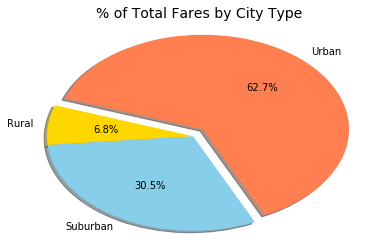

In [4]:
# Calculate Type Percents
rural_faretotal = rural['fare'].sum()
suburban_faretotal = suburban['fare'].sum()
urban_faretotal = urban['fare'].sum()
# Build Pie Chart
city_type = ["Urban", "Rural", "Suburban"]

city_faretotal = [urban_faretotal, rural_faretotal, suburban_faretotal]

city_colors = ["coral", "gold", "skyblue"]

explode = [0.1, 0, 0]


plt.pie(city_faretotal, explode=explode, labels=city_type, colors=city_colors,
        autopct="%1.1f%%", shadow=True, startangle=295)

plt.axis("tight")

plt.title("% of Total Fares by City Type", fontsize=14)
#Save Figure
plt.savefig("Images/pyber_%total_fares_bytype.png")
# Show Figure
plt.show()

## Total Rides by City Type

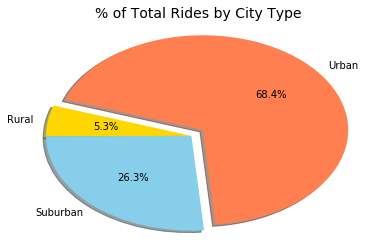

In [5]:
# Calculate Ride Percents
total_types=pyber_data['type'].count()
rural_ridetotal = (rural['ride_id'].count())/total_types
suburban_ridetotal = (suburban['ride_id'].count())/total_types
urban_ridetotal = (urban['ride_id'].count())/total_types


# Build Pie Chart
ty_type = ["Urban", "Rural", "Suburban"]

city_ridetotal = [urban_ridetotal, rural_ridetotal, suburban_ridetotal]

city_colors = ["coral", "gold", "skyblue"]

explode = [0.1, 0, 0]

plt.pie(city_ridetotal, explode=explode, labels=city_type, colors=city_colors,
        autopct="%1.1f%%", shadow=True, startangle=275)

plt.axis("tight")

plt.title("% of Total Rides by City Type", fontsize=14)
# Save Figure
plt.savefig("Images/pyber_%total_rides_bytype.png")
# Show Figure
plt.show()

## Total Drivers by City Type

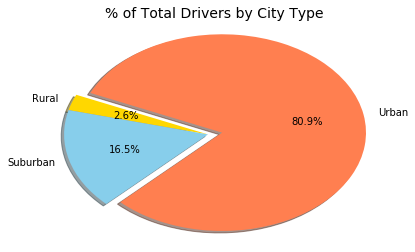

In [7]:
rural_d = city_data[city_data['type']=='Rural']
suburban_d = city_data[city_data['type']=='Suburban']
urban_d = city_data[city_data['type']=='Urban']

# Calculate Driver Percents
rural_drivertotal = rural_d['driver_count'].sum()
suburban_drivertotal = suburban_d['driver_count'].sum()
urban_drivertotal = urban_d['driver_count'].sum()

# Build Pie Charts
city_type = ["Urban", "Rural", "Suburban"]

city_drivertotal = [urban_drivertotal, rural_drivertotal, suburban_drivertotal]

city_colors = ["coral", "gold", "skyblue"]

explode = [0.1, 0, 0]

plt.pie(city_drivertotal, explode=explode, labels=city_type, colors=city_colors,
        autopct="%1.1f%%", shadow=True, startangle=225)

plt.axis("tight")

plt.title("% of Total Drivers by City Type", fontsize=14)
# Save Figure
plt.savefig("Images/pyber_%total_drivers_bytype.png")
# Show Figure
plt.show()